In [1]:
import pandas as pd
import sqlalchemy as sqmy
import matplotlib.pyplot as plt

In [2]:
class QueryDB:
    def __init__(self):
        # Create an SQLite engine
        self.engine = sqmy.create_engine("sqlite:///customer.db")

    def execute(self, qry):
        # Execute the query and return a DataFrame
        return pd.read_sql_query(qry, self.engine)

    def plot(self, qry, x_col, y_col):
        # Execute the query and get the DataFrame
        df = self.execute(qry)
        
        # Check if the specified columns exist in the DataFrame
        if x_col not in df.columns or y_col not in df.columns:
            raise ValueError(f"Columns '{x_col}' or '{y_col}' not found in the DataFrame.")
        
        # Plot the data
        plt.figure(figsize=(10, 5))
        plt.plot(df[x_col], df[y_col], marker='o', linestyle='-', color='b', label=y_col)
        plt.title(f'{y_col} by {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.xticks(rotation=45)
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()

In [3]:
db = QueryDB()

In [8]:
qry = """
SELECT COUNT(CUSTOMER_ID) FROM INFO
WHERE AGE > 50
"""
db.execute(qry)

,COUNT(CUSTOMER_ID)
0,28663


In [18]:
qry = """
SELECT strftime('%Y-%m', CUSTOMER_JOIN_DATE) AS join_month, COUNT(*) AS customer_count
FROM INFO
GROUP BY join_month
"""
db.execute(qry)

,join_month,customer_count
0,2021-07,2593
1,2021-08,2465
2,2021-09,2186
3,2021-10,2309
4,2021-11,2171
5,2021-12,2312
6,2022-01,2605
7,2022-02,2556
8,2022-03,2959
9,2022-04,2736


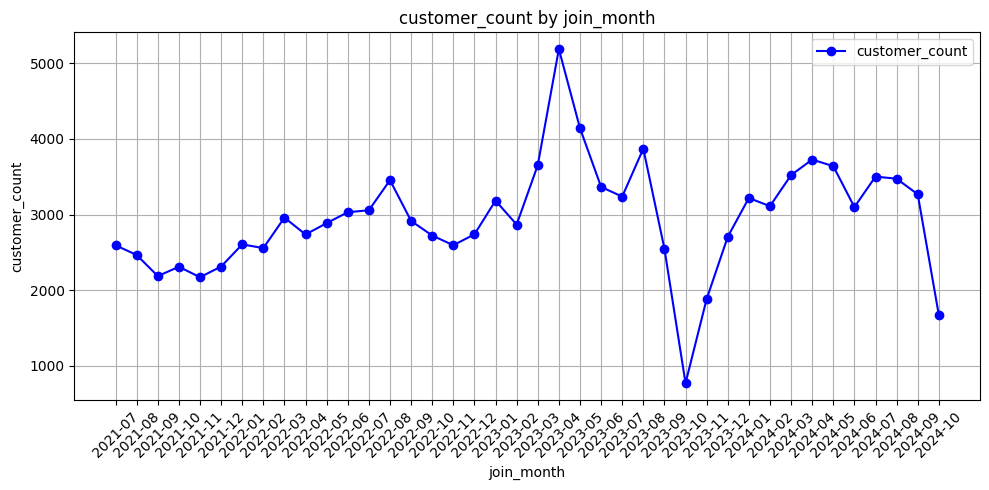

In [19]:
db.plot(qry, "join_month", "customer_count")